In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

The MNIST dataset is preloaded in TensorFlow, making it easy to access. It contains 60,000 training and 10,000 testing grayscale images of handwritten digits (0-9).

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)


Reshape the data to fit the input shape required by Conv2D layers.
Normalize the pixel values for better model performance.

In [4]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
X_train, X_test = X_train / 255.0, X_test / 255.0

This model has:

Conv2D layers for pattern detection.
MaxPooling layers for dimensionality reduction.
Dense layers for final classification.

In [5]:
model = tf.keras.models.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
history = model.fit(X_train, y_train, epochs=5, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 56s 32ms/step - accuracy: 0.4869 - loss: 1.4506 - val_accuracy: 0.9292 - val_loss: 0.2521
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 83s 33ms/step - accuracy: 0.9170 - loss: 0.2799 - val_accuracy: 0.9527 - val_loss: 0.1618
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 77s 30ms/step - accuracy: 0.9440 - loss: 0.1798 - val_accuracy: 0.9695 - val_loss: 0.1158
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 30ms/step - accuracy: 0.9587 - loss: 0.1396 - val_accuracy: 0.9697 - val_loss: 0.1137
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.9645 - loss: 0.1155 - val_accuracy: 0.9728 - val_loss: 0.0992


In [7]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test accuracy:", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9644 - loss: 0.1131
Test accuracy: 0.9682000279426575


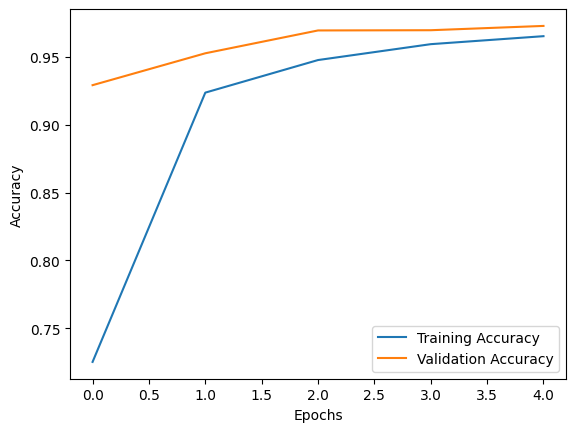

In [8]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


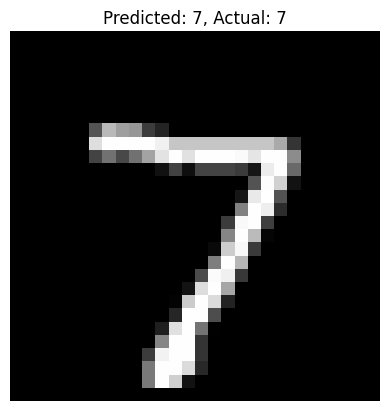

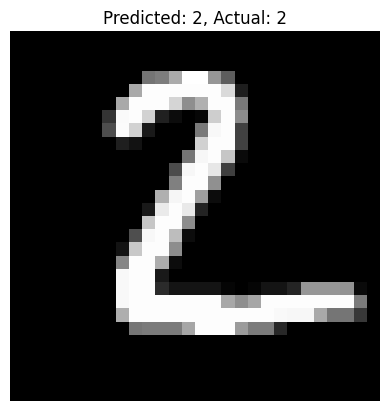

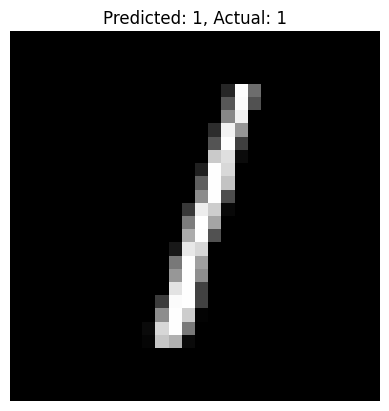

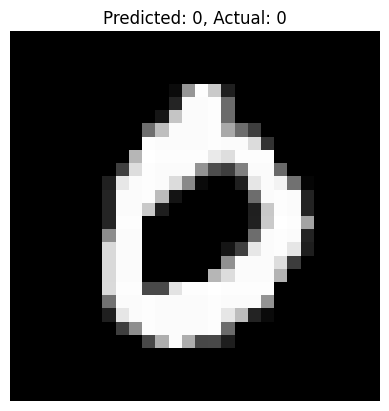

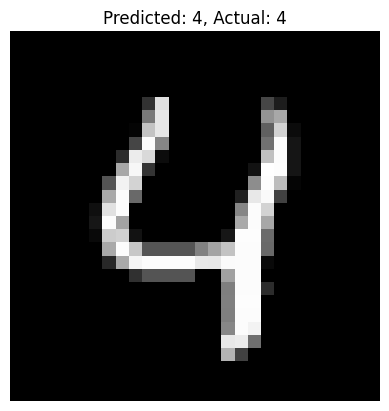

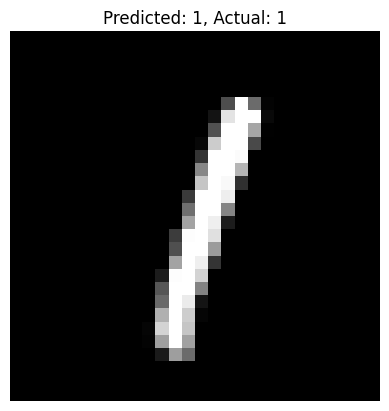

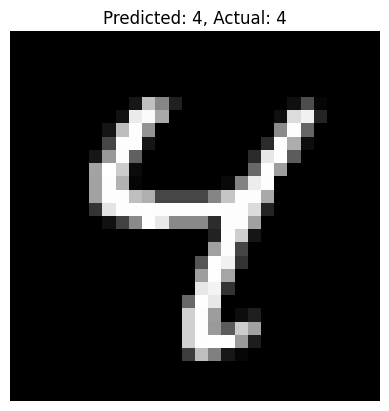

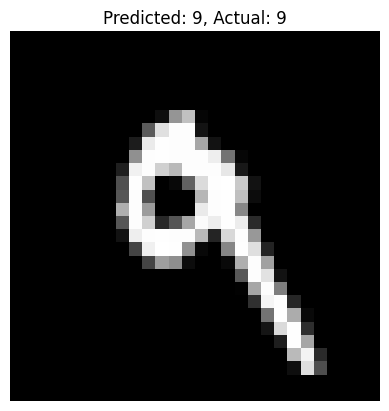

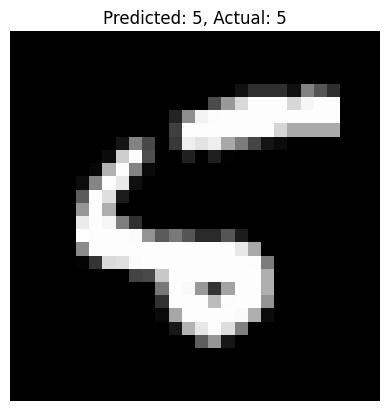

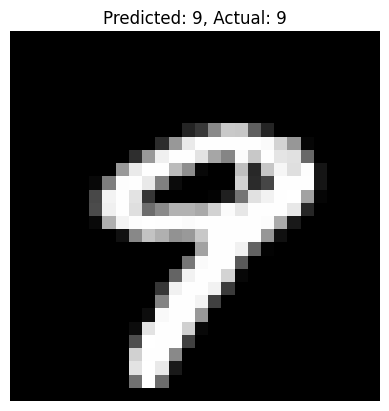

In [9]:
predictions = model.predict(X_test[:10])
for i in range(10):
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predictions[i].argmax()}, Actual: {y_test[i]}")
    plt.axis('off')
    plt.show()